In [518]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
import sqtdiat.qops as sq
plt.style.use("default")

(0.0, 1.1)

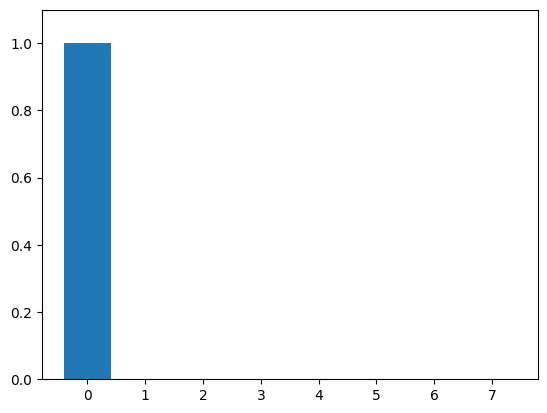

In [519]:
def Coin_op(N, op = "H"):
    if op == 'H': 
        H_op = np.array([[1, 1], [1, -1]]) / np.sqrt(2) 
        if N == 1:
            return H_op
        else:
            H_op2 = H_op
            for _ in range(N - 1):
                H_op2 = np.kron(H_op2, H_op)
            return H_op2
    elif op == 'G':
        return np.ones((2**N, 2**N)) * (1 / 2**(N - 1)) - np.eye(2**N)

n = 3
initial_state =  sq.norm_state_vec(np.array([1] + [0] * (2 ** (n) - 1)))
grover_gate = np.full((2**n, 2**n), 1 / 2 ** (n - 1)) - np.eye(2**n)
grover_res = np.dot(initial_state, Coin_op(n, 'H'))
grover_res = np.dot(grover_res, Coin_op(n, 'H'))
grover_res = np.square(grover_res)
plt.bar(range(2**n), grover_res)
plt.ylim(0, 1.1)

In [520]:
# Coin_op(4, 'G')
def ptrace_1(arr):
    n = arr.shape[0] // 2
    new_arr = arr[:n, :n] + arr[n:, n:]
    return new_arr / np.trace(new_arr)
# ptrace_1(np.array([[i * j for i in range(4)] for j in range(4)]))

def shift(n):
    return np.kron(np.array([[1, 0], [0, 0]]), np.diag(np.ones((2**n - 1)), k = 1)) + np.kron(np.array([[0, 0], [0, 1]]), np.diag(np.ones((2**n - 1)), k = -1))
qw_op = shift(5) @ (np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2**5)))
st_only = sq.density_mat_from_state_vec(sq.norm_state_vec([1 if i < 10 else 0 for i in range(32)]))

<BarContainer object of 32 artists>

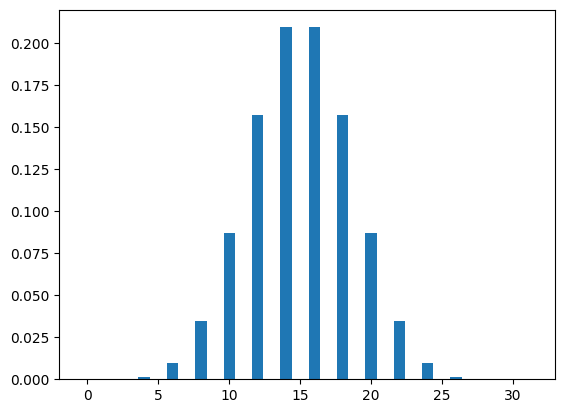

In [521]:
st_only = sq.density_mat_from_state_vec(sq.norm_state_vec([1 if i == 15 else 0 for i in range(32)]))
qw_op = shift(5) @ (np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2**5)))
for i in range(13):
    val = np.random.randint(2)
    if val == 0:
        st = np.array([[0, 0], [0, 1]])
    else:
        st = np.array([[1, 0], [0, 0]])
    # print(st, np.kron(st, st_only) )
    st_fin = qw_op @ np.kron(st, st_only) @ qw_op.conjugate().T
    st_only = ptrace_1(st_fin)
plt.bar(range(32), np.diag(st_only))

BrokenPipeError: [Errno 32] Broken pipe

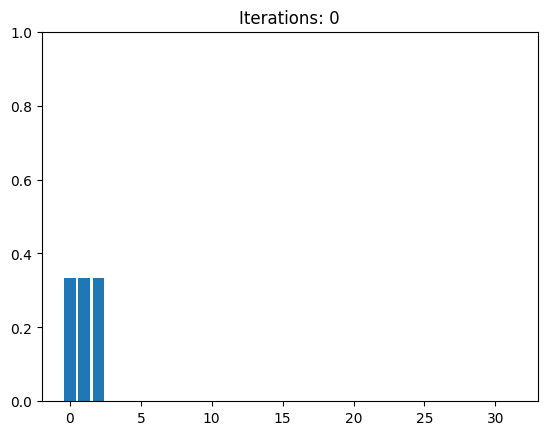

In [522]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sqtdiat.qops as sq # Assuming this is a custom module

# Define the functions from the given code
def ptrace_1(arr):
    n = arr.shape[0] // 2
    return arr[:n, :n] + arr[n:, n:]

def shift(n):
    return np.kron(np.array([[1, 0], [0, 0]]), np.diag(np.ones((2**n - 1)), k=1)) + \
           np.kron(np.array([[0, 0], [0, 1]]), np.diag(np.ones((2**n - 1)), k=-1))

# Initialize the variables and matrices
qw_op = shift(5) @ (np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2**5)))
st_only = sq.density_mat_from_state_vec(sq.norm_state_vec([1 if i < 3 else 0 for i in range(32)]))

# Setup the figure and axis
fig, ax = plt.subplots()
ax.set_ylim(0, 1)
bars = ax.bar(range(32), np.zeros(32))

def animate(num_iterations):
    st_fin = st_only
    for _ in range(num_iterations):
        val = np.random.randint(2)
        if val == 0:
            St = np.array([[1, 0], [0, 0]])
        else:
            St = np.array([[0, 0], [0, 1]])
        st_fin = np.kron(St, st_only)
        st_fin = qw_op @ st_fin @ qw_op.conjugate().T
    st_fin = st_fin / np.trace(st_fin)
    diag_vals = np.diag(ptrace_1(st_fin))
    
    for bar, height in zip(bars, diag_vals):
        bar.set_height(height)
    ax.set_title(f'Iterations: {num_iterations}')

# Create the animation
anim = FuncAnimation(fig, animate, frames=range(0, 501, 5), interval=100)

# Save the animation as an MP4 file
anim.save('quantum_walk.mp4', writer='ffmpeg', fps=10)

plt.close()

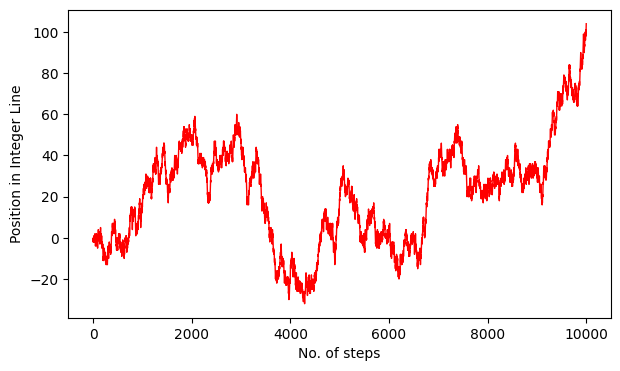

In [523]:
def ran_walk(steps = 1000, p0 = 0.5):
    x = 0
    x_pos = []
    for i in range(steps):
        coin_flip = np.random.choice(a = [0, 1], p = [p0, 1 - p0])
        if coin_flip == 0:
            x += 1
        elif coin_flip == 1:
            x -= 1
        x_pos.append(x)
    return x_pos
all_walks = np.zeros((1000))
for _ in range(100):
    all_walks += ran_walk(steps = 1000)

all_walks /= 100

# plt.hist(all_walks, bins = len(set(all_walks)) // 2)
# plt.show()

plt.figure(figsize = (7, 4))
plt.plot(ran_walk(10000), linewidth = 1, color = 'red')
plt.xlabel("No. of steps")
plt.ylabel("Position in Integer Line")
plt.savefig("DDGS/ran_walk_10000.pdf")
plt.show()

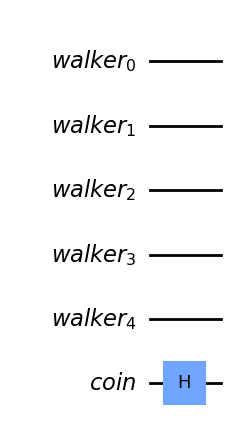

In [289]:
walker_qubits = QuantumRegister(5, 'walker')
coin_qubit = QuantumRegister(1, 'coin')

sim = Aer.get_backend('aer_simulator')

qwalk = QuantumCircuit(walker_qubits, coin_qubit)

def one_step(qc: qwalk, wq: walker_qubits, cq: coin_qubit) -> QuantumCircuit:
    qc.h(cq)
    for i in reversed(range(len(wq))):
        

one_step(qwalk, walker_qubits, coin_qubit)

qwalk.draw('mpl')

In [532]:
n = 9
C = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
S = shift(n)
W = S @ (np.kron(C, np.eye(2**(n)) / n))

C:\Users\Ashish\AppData\Local\Temp\ipykernel_22700\1949950024.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


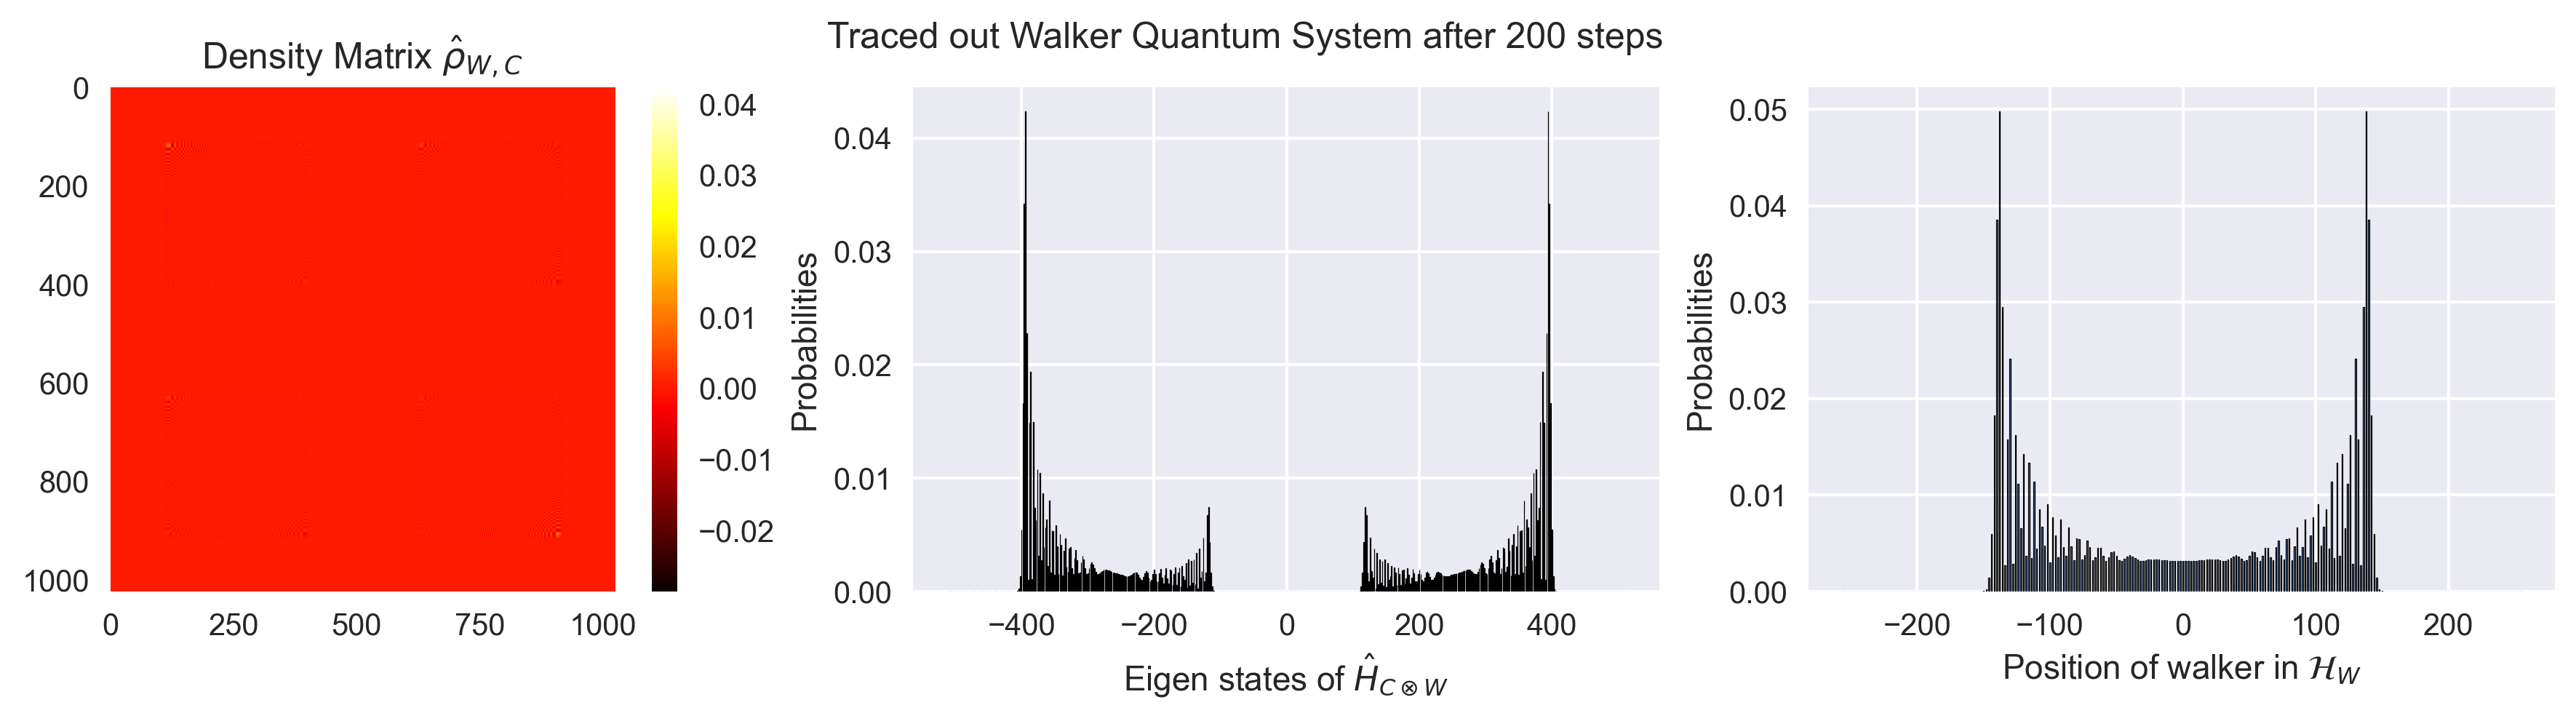

In [533]:
zero = np.array([1 if i == 2**(n - 1) else 0 for i in range(2**n)])
zero_state = np.kron(np.eye(2) / 2, sq.density_mat_from_state_vec(zero))

all_outs = []
all_outs.append(zero_state)
for _ in range(200):
    zero_state = W @ zero_state @ W.conjugate().T
    zero_state = zero_state / np.trace(zero_state)
    all_outs.append(zero_state)

# plt.figure(figsize = (4, 10))
# for i in range(10):
#     plt.subplot(10, 2, i * 2 + 1)
#     plt.imshow(ptrace_1(all_outs[i]))
#     plt.subplot(10, 2, i * 2 + 2)
#     plt.bar(range(2**n), np.diag(ptrace_1(all_outs[i])))

step = 200
plt.style.use('seaborn')
plt.figure(figsize = (15, 3), dpi = 300)
plt.subplot(1, 3, 1)
plt.suptitle(f"Traced out Walker Quantum System after {step} steps")
plt.title(r"Density Matrix $\hat{\rho}_{W, C}$")
plt.imshow(all_outs[step], cmap = 'hot')
plt.grid()
plt.colorbar()
plt.subplot(1, 3, 2)
plt.bar(range(-2**(n), 2**(n), 2), np.diag(all_outs[step])[::2], edgecolor = 'black')
# plt.ylim((0, 1.1))
plt.xlabel(r"Eigen states of $\hat{H}_{C \otimes W}$")
plt.ylabel("Probabilities")
plt.subplot(1, 3, 3)
# plt.grid()
plt.bar(range(-2**(n - 1), 2**(n - 1), 2), np.diag(ptrace_1(all_outs[step]))[::2], edgecolor = 'black')
plt.xlabel(r"Position of walker in $\mathcal{H}_W$")
plt.ylabel("Probabilities")
# plt.ylim((0, 1.1))
plt.savefig(f"DDGS/ran_walk_{step}.pdf")

<BarContainer object of 512 artists>

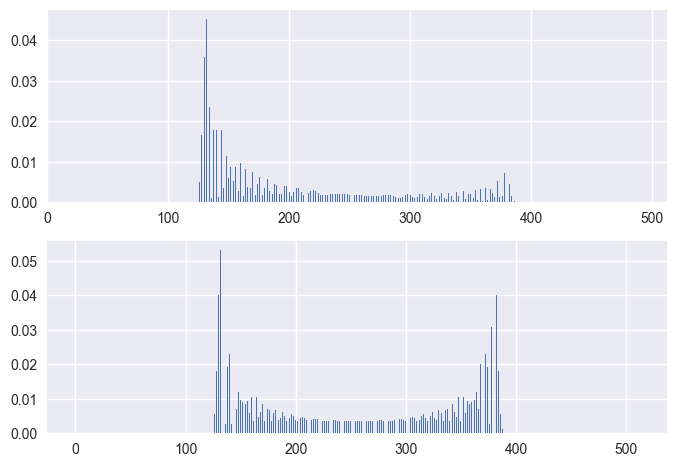

In [534]:
plt.subplot(2, 1, 1)
plt.bar(range(2**(n + 1)), np.diag(all_outs[180]))
plt.xlim((0, 2**n))
plt.subplot(2, 1, 2)
plt.bar(range(2**n), np.diag(ptrace_1(all_outs[180])))

<BarContainer object of 512 artists>

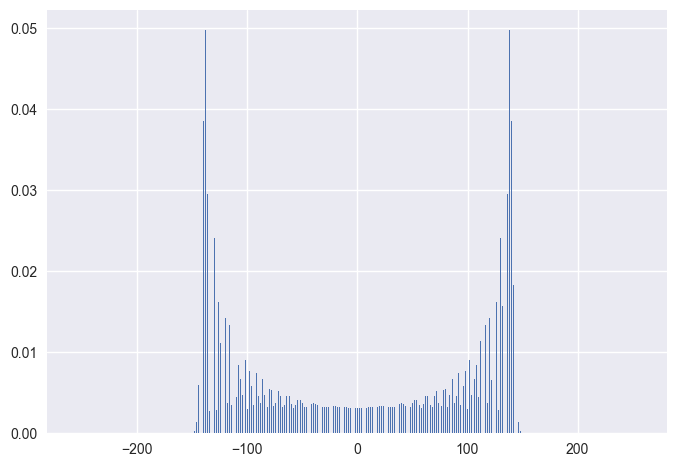

In [535]:
plt.bar(range(-2**(n - 1), 2**(n - 1), 1), np.diag(ptrace_1(all_outs[step]))[::1])

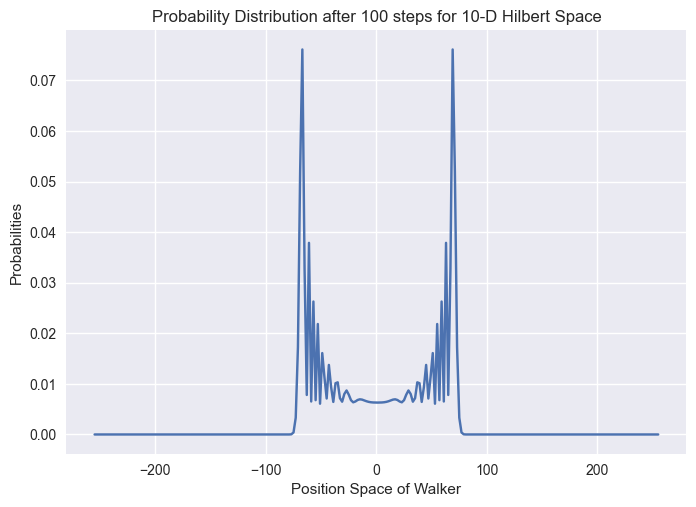

In [537]:
plt.plot(range(-2**(n - 1) + 1, 2**(n - 1), 2), np.diag(ptrace_1(all_outs[100]))[::2])
plt.xlabel("Position Space of Walker")
plt.ylabel("Probabilities")
plt.title("Probability Distribution after 100 steps for 10-D Hilbert Space")
plt.savefig("DDGS/Prob_dis_100.pdf")